In [250]:
# %pip install graphviz


from graphviz import Digraph
from IPython.display import display, SVG
import math


In [251]:
class Value:
    def __init__(self, data, _children=(), _op="", label=""):
        self.data = data
        self._children = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0

    def __repr__(self):
        return f"Value(data={self.data} grad:{self.grad} label:{self.label})"

    def __add__(self, other):
        return Value(self.data + other.data, (self, other), "+")

    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), "*")
    def tanh (self):
        x = self.data
        data =( (math.exp(x)-math.exp(-x))/(math.exp(x)+math.exp(-x)))
        output = Value(data,{self},"tanh")
        return output

        

h = 0.001
a = Value(2)
b = Value(2)
c = a+b
e = Value(2+h)
d = e +c

f = Value(2)
L = f+d
print(L._children)
value = L.tanh()
value._children
# print((L+h).vale)




{Value(data=2 grad:0 label:), Value(data=6.0009999999999994 grad:0 label:)}


{Value(data=8.001 grad:0 label:)}

In [252]:
def trace(root):
    nodes, edges = set(), set()

    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._children:
                edges.add((child, v))
                build(child)

    build(root)
    return nodes, edges


def draw_dot(root):
    dot = Digraph(format="svg", graph_attr={"rankdir": "LR"})
    nodes, edges = trace(root)

    for n in nodes:
        uid = str(id(n))
        label = f"{n.label}\ndata={n.data:.4f}\ngrad={n.grad:.4f}"
        dot.node(uid, label=label, shape="record")
        if n._op:
            op_id = uid + n._op
            dot.node(op_id, label=n._op)
            dot.edge(op_id, uid)

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot


Value(data=4 grad:12 label:)
Value(data=2 grad:24 label:)
Value(data=3 grad:6 label:)
Value(data=8 grad:6 label:)
Value(data=11 grad:6 label:)
Value(data=6 grad:11 label:)
Value(data=66 grad:1 label:)
0.0
({Value(data=3 grad:6 label:), Value(data=11 grad:6 label:), Value(data=8 grad:6 label:), Value(data=6 grad:11 label:), Value(data=66 grad:1 label:), Value(data=2 grad:24 label:), Value(data=4 grad:12 label:)}, {(Value(data=4 grad:12 label:), Value(data=8 grad:6 label:)), (Value(data=2 grad:24 label:), Value(data=8 grad:6 label:)), (Value(data=3 grad:6 label:), Value(data=11 grad:6 label:)), (Value(data=8 grad:6 label:), Value(data=11 grad:6 label:)), (Value(data=6 grad:11 label:), Value(data=66 grad:1 label:)), (Value(data=11 grad:6 label:), Value(data=66 grad:1 label:))})
66 66


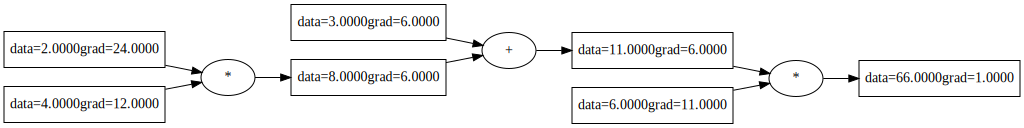

In [253]:
def stage2():
  h= 0.001

  a = Value(4)
  b = Value(2)
  c = Value(3)
  e =a*b
  d = e+c
  f = Value(6)
  

 
  L = d*f
  L1 = L.data

  a = Value(4)
  a.grad = 12
  b = Value(2)
  b.grad = 24
  c = Value(3)
  c.grad = 6
  e =a*b
  e.grad= 6
  d = e+c
  d.data
  f = Value(6)
  f.data 
  f.grad = 11
  L = d*f
  L.grad = 1
  d.grad = 6


  
  print(a)
  print(b)
  print(c)
  print(e)
  print(d)
  print(f)
  print(L)
 

  L2 = L.data
  

  print((L2-L1)/h)
  print(trace(L))
  print(L1,L2)
  svg = draw_dot(L)
  display(SVG(svg.pipe()))
stage2()


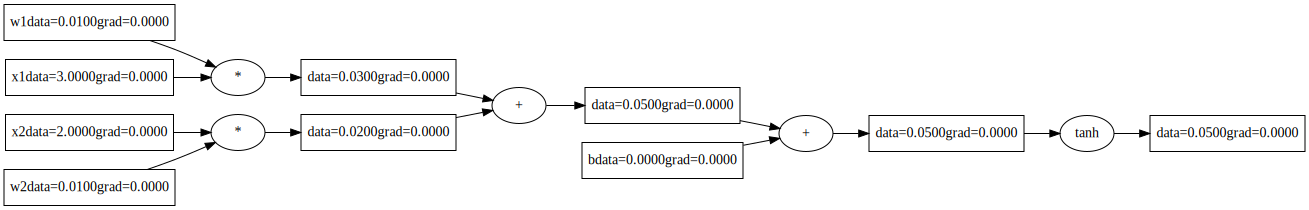

In [261]:

#simple neuron 
x1= Value(3 ,label="x1")
x2 = Value(2,label="x2")
w1 = Value(0.01,label="w1")
w2= Value(0.010,label="w2")
b = Value(0 ,label="b")

d1 = x1*w1
d2 = x2*w2 
n = d1+d2+b
value = n.tanh()
draw_dot(value)
# print(output
#       )

In [255]:
# def stage2():
#   h= 0.001

#   a = Value(4)
#   b = Value(2)
#   c = Value(3)
#   e =a*b
#   d = e+c
#   f = Value(6)
  

 
#   L = d*f
#   L1 = L.data

#   a = Value(4)
#   a.grad = 12
#   b = Value(2)
#   b.grad = 24
#   c = Value(3)
#   c.grad = 6
#   e =a*b
#   e.grad= 6
#   d = e+c
#   d.data
#   f = Value(6)
#   f.data 
#   f.grad = 11
#   print(f)
#   d.grad = 6
#   print(d)
#   print(d)
 
#   L = d*f
#   L2 = L.data

#   print((L2-L1)/h)
# stage2()


In [256]:
# l1 = 2
# l2 = 2+h
# (l2-l1)/h

4.001 -4

0.001000000000000334